In [1]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from numpy.random import Generator, PCG64

import tqdm
import json
import inspect
import warnings
from IPython.display import display, Markdown, Latex

warnings.filterwarnings('ignore')

In [13]:
import logging
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

In [2]:
def get_sample_from_distribution(n_sample, params):
    """
    Return a sample of size N from de distribution
    """
    scale, loc, b, a = params["scale"], params["loc"], params["b"], params["a"]
    #logger.info(f"param a: {a} \n param b: {b} \n param loc: {loc} \n param scale: {scale}")
    distribution = stats.johnsonsu(a=a, b=b, loc=loc, scale=scale)
    #distribution.random_state = random_state
    return distribution.rvs(size=n_sample) if not pd.isnull(n_sample) else 0

# Read Data Layer Process

In [3]:
df_output = pd.read_csv("../../data/output_layer_process.csv")

In [9]:
display(Markdown(f"#### Grouped Data: sum daily demand and quantity of customer"))
display(df_output.groupby(["layer","month"]).agg(demand_daily=("demand_daily","sum"), n_customer=("cod_customer", "count")))

#### Grouped Data: sum daily demand and quantity of customer

demand_daily  n_customer
layer month                          
0     1             10788        4572
      2              9903        4133
      3             12941        5385
      4             12262        5104
      5             11683        4882
      6             14215        5588
      7             13486        5583
      8             13378        5518
      9             15964        6338
      10            18074        7124
      11            16574        6434
      12            21883        7836
1     1              3039          33
      2              2818          32
      3              1590          20
      4              2076          24
      5              3378          39
      6              3098          35
      7              4633          50
      8              3558          40
      9              3544          40
      10             4688          53
      11             5769          61
      12             7649          80
2     1              6099         207
      2              4226         154
      3              5888         204
      4              4969         173
      5              5053         181
      6              6366         221
      7              6004         217
      8              5725         201
      9              7513         271
      10             8590         298
      11             7906         294
      12             9921         349

# Read Params Distributions Jhonsonsu

In [10]:
f = open('../../data/scenario-generation/distribution_params.json')
params = json.load(f)
params

{'low': {'1': {'a': -4.807745279338757,
   'b': 0.773388884111248,
   'loc': 0.9927181072134932,
   'scale': 0.003381593167730684},
  '2': {'a': -4.816430790641132,
   'b': 0.7797548561312492,
   'loc': 0.99437811936145,
   'scale': 0.0036337374577629688},
  '3': {'a': -4.947549766877758,
   'b': 0.7777076520263277,
   'loc': 0.9911220946881644,
   'scale': 0.003033144998833001},
  '4': {'a': -4.919360522179474,
   'b': 0.7740023485024676,
   'loc': 0.9909736001278993,
   'scale': 0.0030391021166006225},
  '5': {'a': -4.126886682947598,
   'b': 0.7850403991916988,
   'loc': 0.9882063380291453,
   'scale': 0.00926217123085547},
  '6': {'a': -4.890860326168944,
   'b': 0.7825434846293198,
   'loc': 0.9848989893866555,
   'scale': 0.0037570725613611314},
  '7': {'a': -5.081622394812156,
   'b': 0.787335957455368,
   'loc': 0.9840140799725035,
   'scale': 0.002843352997077343},
  '8': {'a': -5.052541315493812,
   'b': 0.7838769849244744,
   'loc': 0.98280708415095,
   'scale': 0.0028468902

# Validate Sampling vs Empirical

In [11]:
PERIODS = [i for i in range(1,13)]
LAYERS = {0: "low", 1:"high", 2:"medium"}

INFO:__main__:**********************************
Running for period 1
INFO:__main__:--------------------------- 
Running for layer low
INFO:__main__:[params used] {'a': -4.807745279338757, 'b': 0.773388884111248, 'loc': 0.9927181072134932, 'scale': 0.003381593167730684}


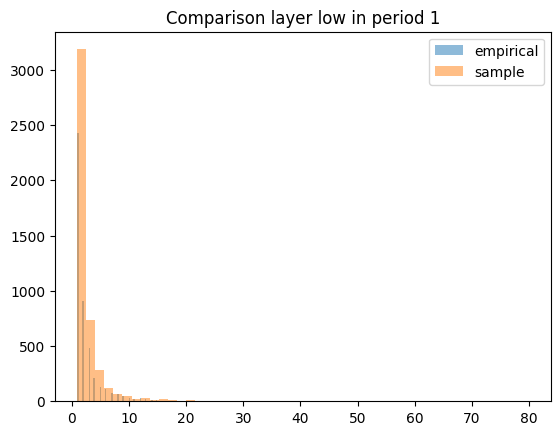

INFO:__main__:--------------------------- 
Running for layer high
INFO:__main__:[params used] {'a': -1.9668574542428776, 'b': 1.0289345218169184, 'loc': 63.80970508697986, 'scale': 5.67435615174954}


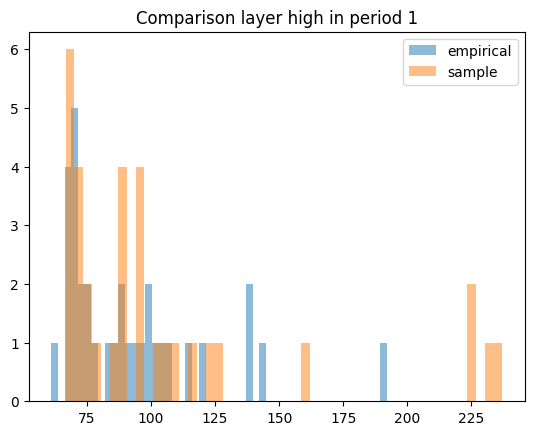

INFO:__main__:--------------------------- 
Running for layer medium
INFO:__main__:[params used] {'a': -6.556301193461888, 'b': 1.2375080219144268, 'loc': 13.853524136087884, 'scale': 0.11985598866854841}


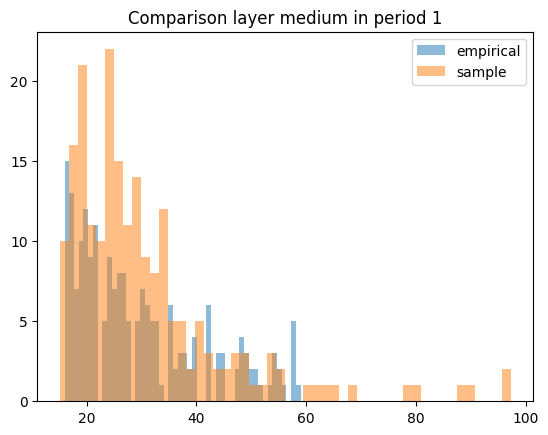

INFO:__main__:**********************************
Running for period 2
INFO:__main__:--------------------------- 
Running for layer low
INFO:__main__:[params used] {'a': -4.816430790641132, 'b': 0.7797548561312492, 'loc': 0.99437811936145, 'scale': 0.0036337374577629688}


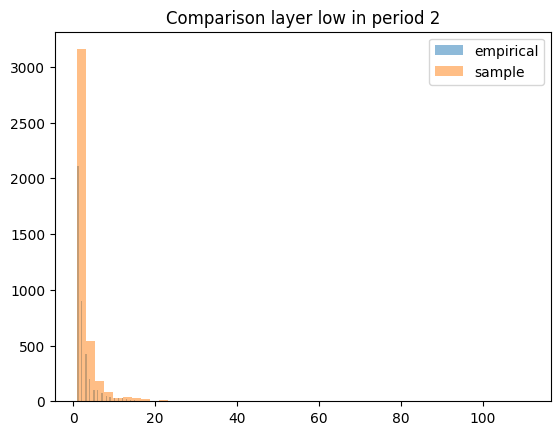

INFO:__main__:--------------------------- 
Running for layer high
INFO:__main__:[params used] {'a': -5.6406481672727224, 'b': 0.9503023552851511, 'loc': 58.35135532844109, 'scale': 0.09935751324910724}


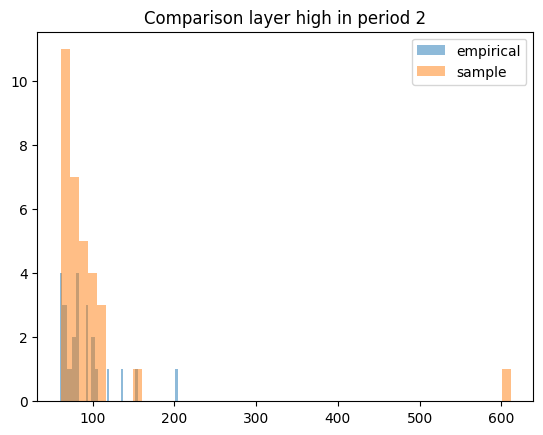

INFO:__main__:--------------------------- 
Running for layer medium
INFO:__main__:[params used] {'a': -5.773764591372251, 'b': 0.9956074553120868, 'loc': 15.406508241095352, 'scale': 0.04846311610584811}


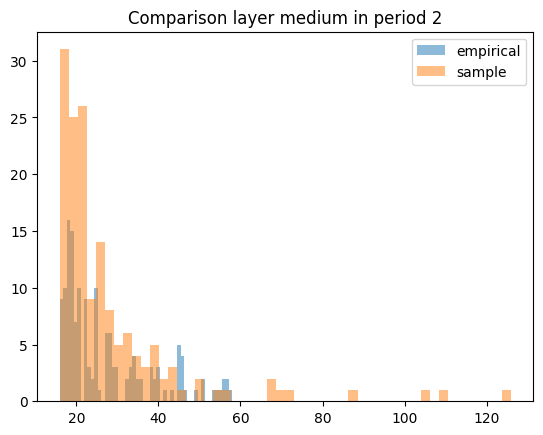

INFO:__main__:**********************************
Running for period 3
INFO:__main__:--------------------------- 
Running for layer low
INFO:__main__:[params used] {'a': -4.947549766877758, 'b': 0.7777076520263277, 'loc': 0.9911220946881644, 'scale': 0.003033144998833001}


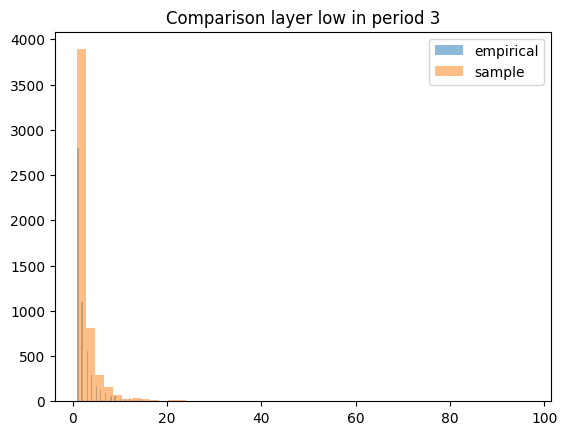

INFO:__main__:--------------------------- 
Running for layer high
INFO:__main__:[params used] {'a': -4.741177423126032, 'b': 0.6714027069102457, 'loc': 60.31554380270673, 'scale': 0.014370080292324484}


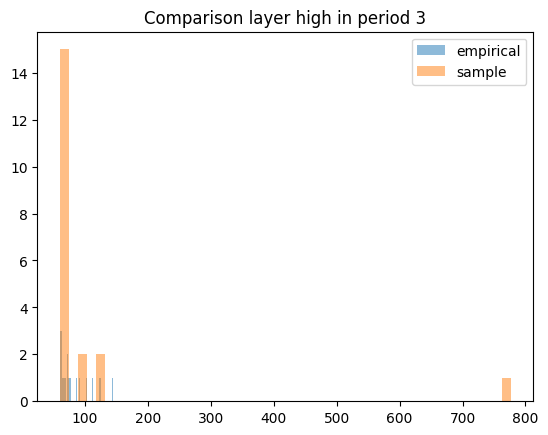

INFO:__main__:--------------------------- 
Running for layer medium
INFO:__main__:[params used] {'a': -6.348079675434668, 'b': 1.2418928951008852, 'loc': 13.864026537820884, 'scale': 0.13935364486274102}


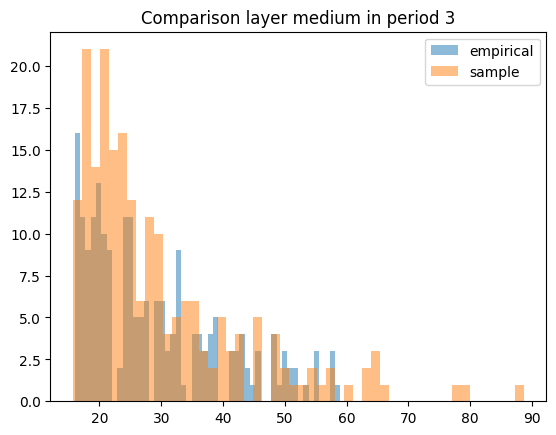

INFO:__main__:**********************************
Running for period 4
INFO:__main__:--------------------------- 
Running for layer low
INFO:__main__:[params used] {'a': -4.919360522179474, 'b': 0.7740023485024676, 'loc': 0.9909736001278993, 'scale': 0.0030391021166006225}


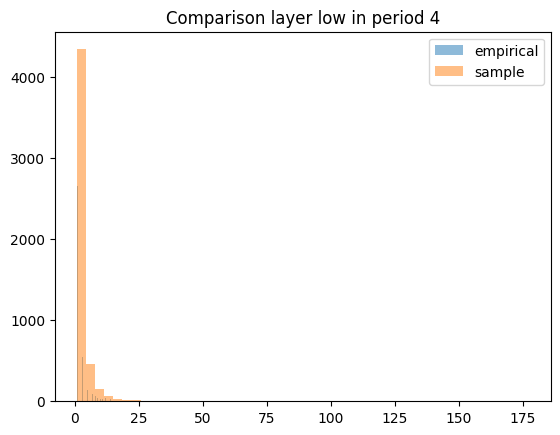

INFO:__main__:--------------------------- 
Running for layer high
INFO:__main__:[params used] {'a': -5.829564690087494, 'b': 1.0447419510406966, 'loc': 57.633819581316544, 'scale': 0.14352192491615245}


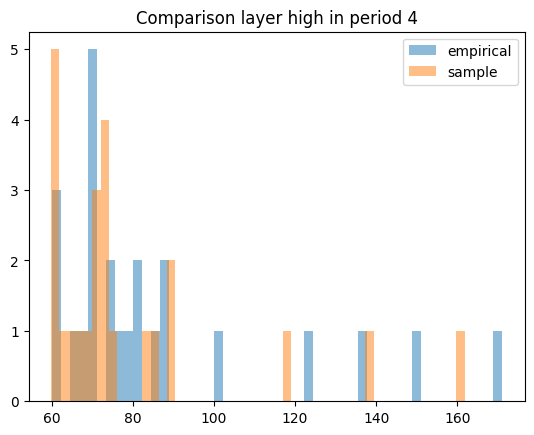

INFO:__main__:--------------------------- 
Running for layer medium
INFO:__main__:[params used] {'a': -5.843239259471051, 'b': 1.0024004567676603, 'loc': 14.972478004841477, 'scale': 0.05465469540867951}


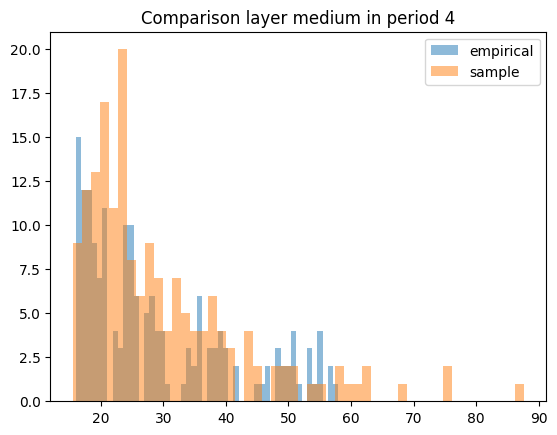

INFO:__main__:**********************************
Running for period 5
INFO:__main__:--------------------------- 
Running for layer low
INFO:__main__:[params used] {'a': -4.126886682947598, 'b': 0.7850403991916988, 'loc': 0.9882063380291453, 'scale': 0.00926217123085547}


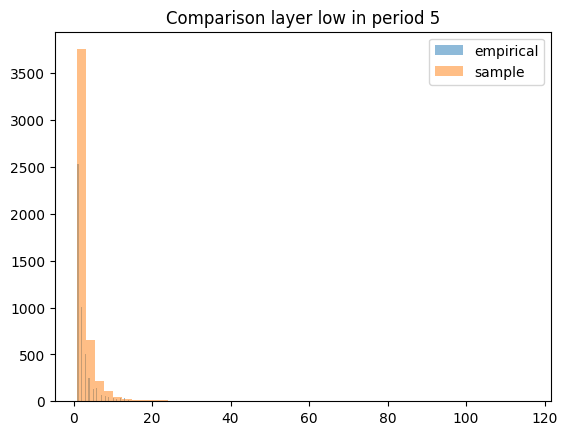

INFO:__main__:--------------------------- 
Running for layer high
INFO:__main__:[params used] {'a': -5.919120108469958, 'b': 1.1408880796507899, 'loc': 57.68430940660082, 'scale': 0.22523216407123436}


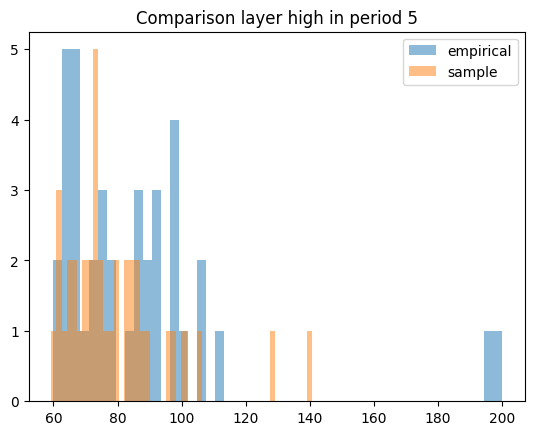

INFO:__main__:--------------------------- 
Running for layer medium
INFO:__main__:[params used] {'a': -6.3052814743810295, 'b': 1.1253159645494555, 'loc': 14.949610512463302, 'scale': 0.06897810715529257}


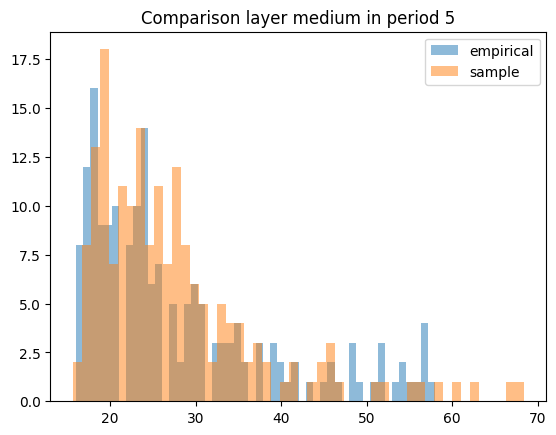

INFO:__main__:**********************************
Running for period 6
INFO:__main__:--------------------------- 
Running for layer low
INFO:__main__:[params used] {'a': -4.890860326168944, 'b': 0.7825434846293198, 'loc': 0.9848989893866555, 'scale': 0.0037570725613611314}


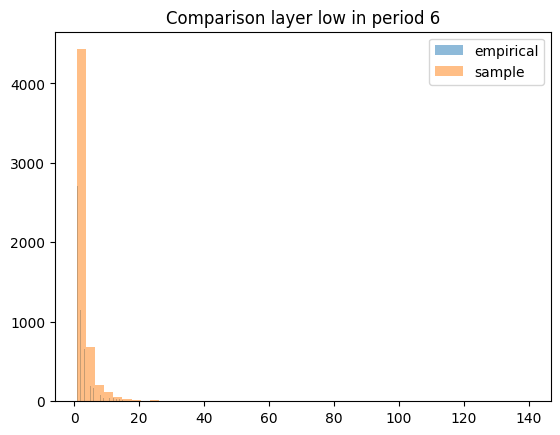

INFO:__main__:--------------------------- 
Running for layer high
INFO:__main__:[params used] {'a': -5.1814236404906335, 'b': 0.8554716960125182, 'loc': 58.656425080331076, 'scale': 0.08174403537699348}


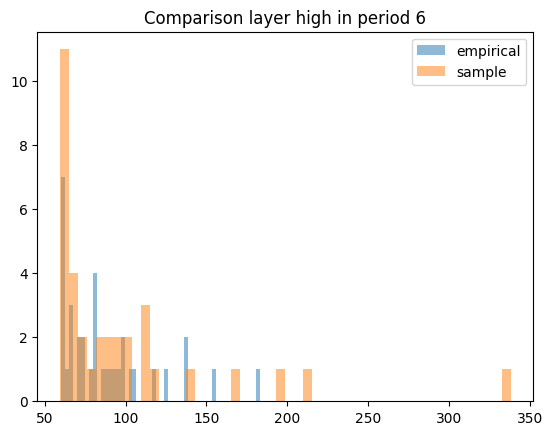

INFO:__main__:--------------------------- 
Running for layer medium
INFO:__main__:[params used] {'a': -5.812753272716826, 'b': 1.0570685013622936, 'loc': 14.859612906496778, 'scale': 0.08003475767210225}


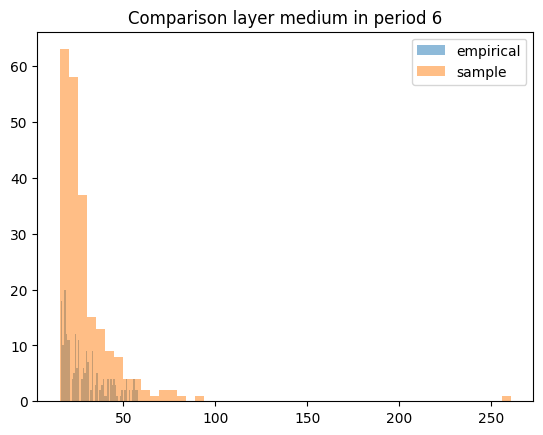

INFO:__main__:**********************************
Running for period 7
INFO:__main__:--------------------------- 
Running for layer low
INFO:__main__:[params used] {'a': -5.081622394812156, 'b': 0.787335957455368, 'loc': 0.9840140799725035, 'scale': 0.002843352997077343}


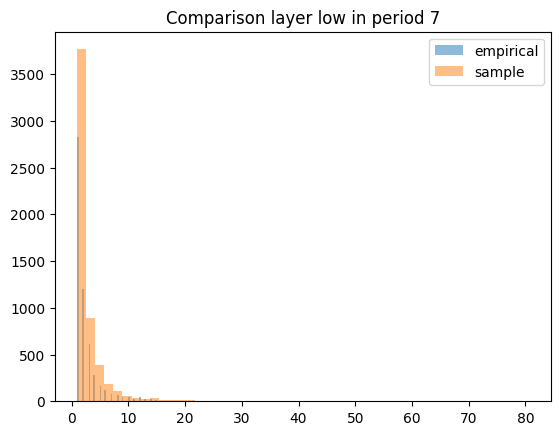

INFO:__main__:--------------------------- 
Running for layer high
INFO:__main__:[params used] {'a': -5.745546661887266, 'b': 1.1443043819256786, 'loc': 57.05734474658655, 'scale': 0.33592656581635105}


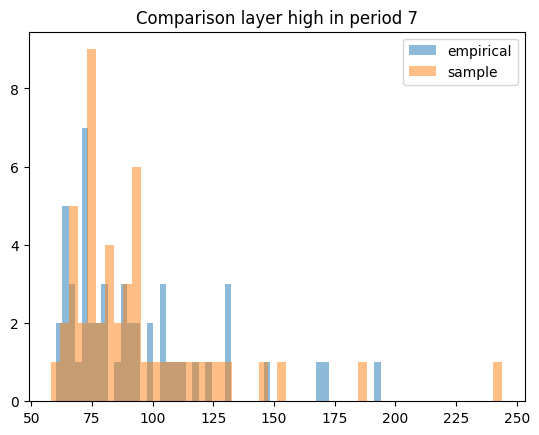

INFO:__main__:--------------------------- 
Running for layer medium
INFO:__main__:[params used] {'a': -5.949782735741057, 'b': 1.0475711515361492, 'loc': 15.104978767551351, 'scale': 0.05978344446776555}


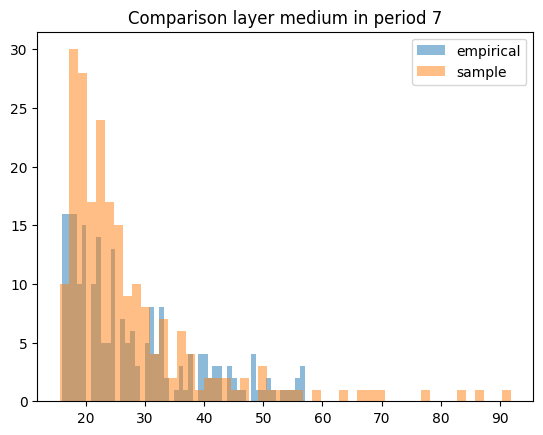

INFO:__main__:**********************************
Running for period 8
INFO:__main__:--------------------------- 
Running for layer low
INFO:__main__:[params used] {'a': -5.052541315493812, 'b': 0.7838769849244744, 'loc': 0.98280708415095, 'scale': 0.002846890206620361}


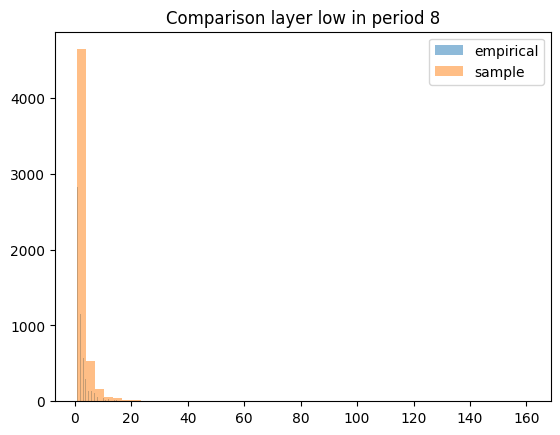

INFO:__main__:--------------------------- 
Running for layer high
INFO:__main__:[params used] {'a': -5.430516941552382, 'b': 0.8658882757809272, 'loc': 61.9870272469695, 'scale': 0.06032004849585545}


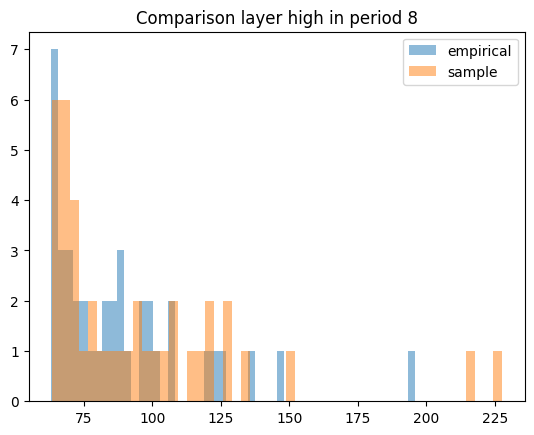

INFO:__main__:--------------------------- 
Running for layer medium
INFO:__main__:[params used] {'a': -5.265951795906961, 'b': 0.917944751248724, 'loc': 15.45269599749615, 'scale': 0.05343173234868276}


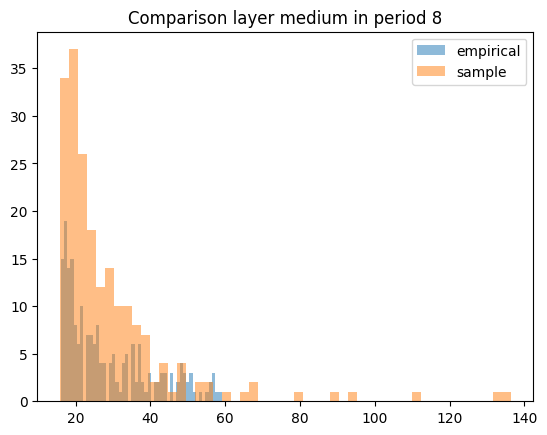

INFO:__main__:**********************************
Running for period 9
INFO:__main__:--------------------------- 
Running for layer low
INFO:__main__:[params used] {'a': -5.057775172178726, 'b': 0.7875992129263074, 'loc': 0.9790647331206848, 'scale': 0.0031448292395374004}


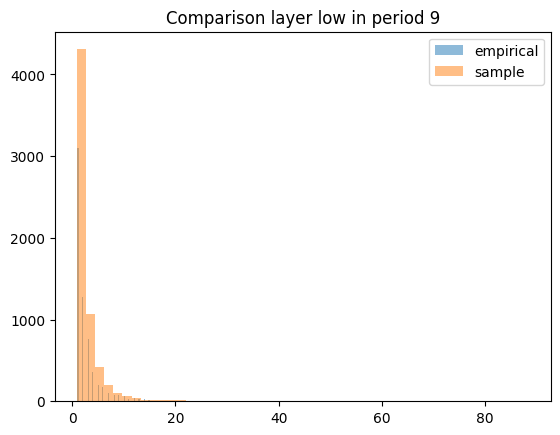

INFO:__main__:--------------------------- 
Running for layer high
INFO:__main__:[params used] {'a': -6.264683925116836, 'b': 1.230092460423234, 'loc': 54.98532344481824, 'scale': 0.30733497163793133}


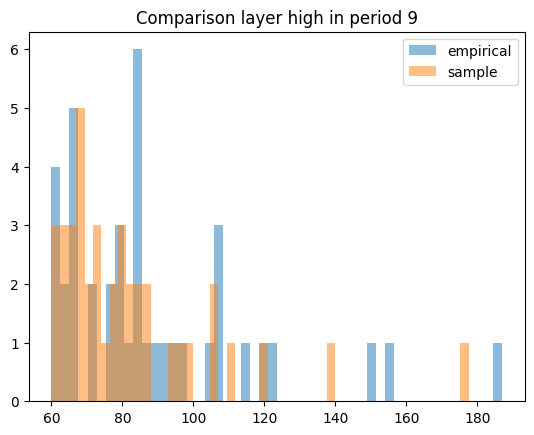

INFO:__main__:--------------------------- 
Running for layer medium
INFO:__main__:[params used] {'a': -5.934396017248199, 'b': 1.0594541074066697, 'loc': 14.905691258451432, 'scale': 0.06677454675901127}


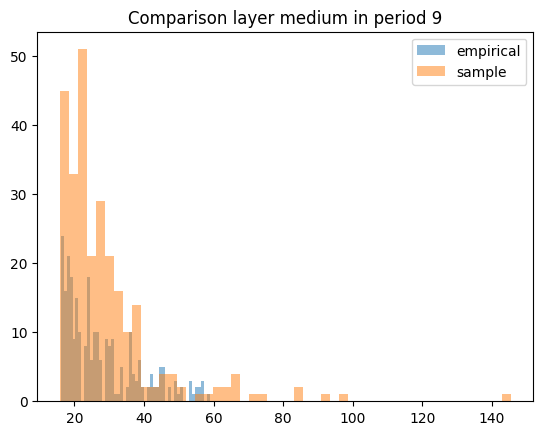

INFO:__main__:**********************************
Running for period 10
INFO:__main__:--------------------------- 
Running for layer low
INFO:__main__:[params used] {'a': -5.081698973619364, 'b': 0.7922277018044817, 'loc': 0.978667105964234, 'scale': 0.003268813170139573}


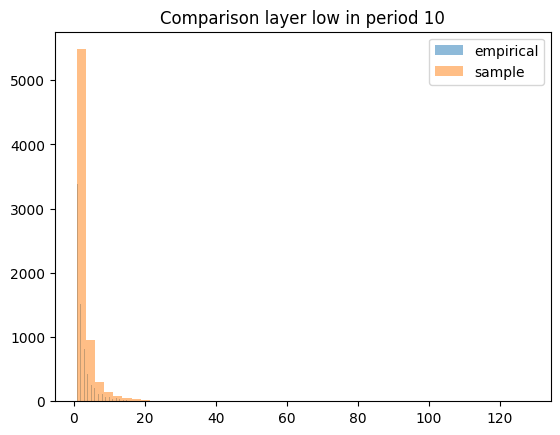

INFO:__main__:--------------------------- 
Running for layer high
INFO:__main__:[params used] {'a': -6.036291222496305, 'b': 1.0086747089221835, 'loc': 57.77361661356906, 'scale': 0.10259936871248657}


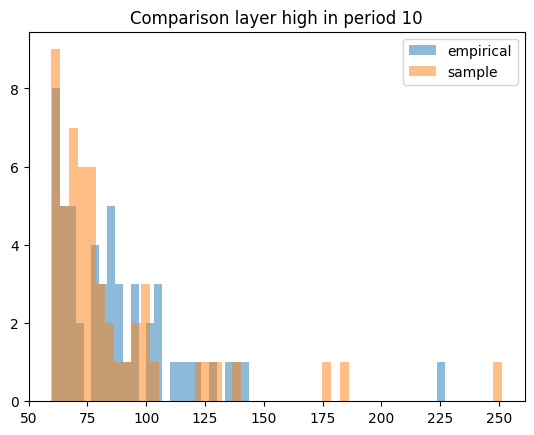

INFO:__main__:--------------------------- 
Running for layer medium
INFO:__main__:[params used] {'a': -6.510029916866657, 'b': 1.2987250317901626, 'loc': 13.571893790540784, 'scale': 0.1596938717057934}


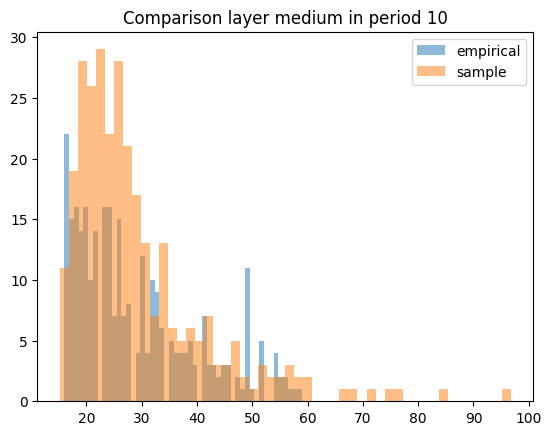

INFO:__main__:**********************************
Running for period 11
INFO:__main__:--------------------------- 
Running for layer low
INFO:__main__:[params used] {'a': -5.217159288145458, 'b': 0.7902864986526663, 'loc': 0.978368471683833, 'scale': 0.0027478361392463766}


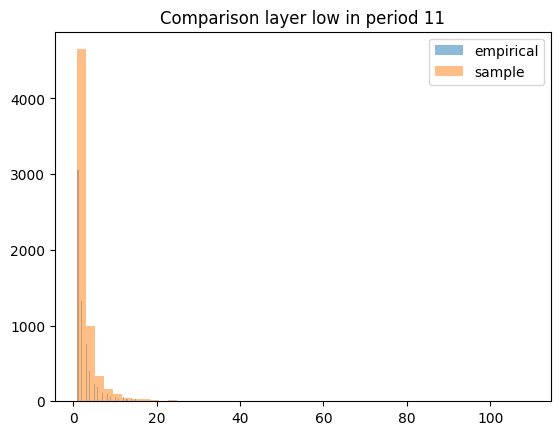

INFO:__main__:--------------------------- 
Running for layer high
INFO:__main__:[params used] {'a': -5.300090706369021, 'b': 0.8164430546588242, 'loc': 58.96441767458225, 'scale': 0.05888333475313784}


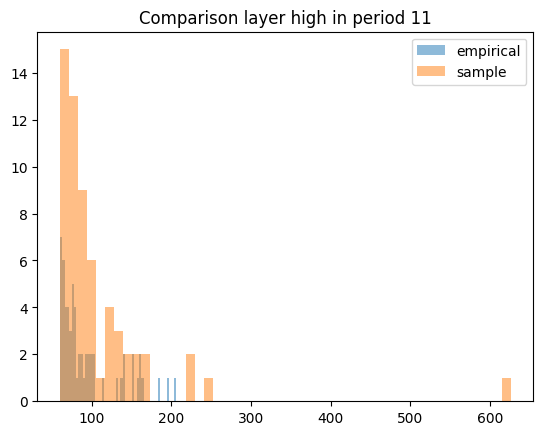

INFO:__main__:--------------------------- 
Running for layer medium
INFO:__main__:[params used] {'a': -6.015776835708564, 'b': 1.1907215290359643, 'loc': 14.717454192415985, 'scale': 0.11737920856016781}


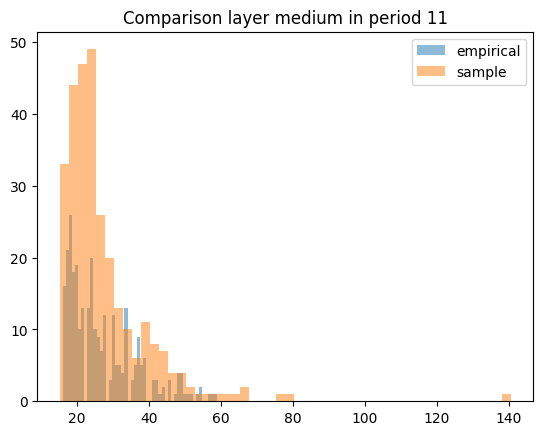

INFO:__main__:**********************************
Running for period 12
INFO:__main__:--------------------------- 
Running for layer low
INFO:__main__:[params used] {'a': -5.253145845420855, 'b': 0.790563600810962, 'loc': 0.9799406870153695, 'scale': 0.002936272303643489}


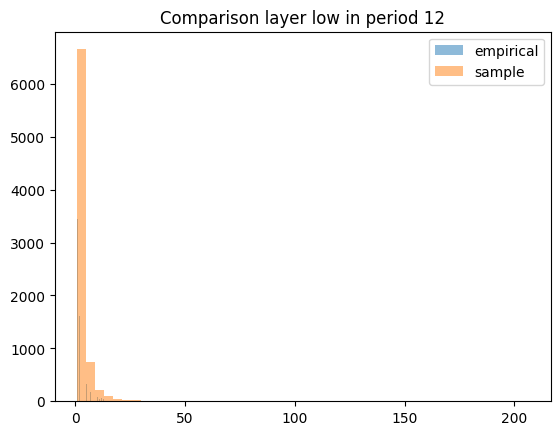

INFO:__main__:--------------------------- 
Running for layer high
INFO:__main__:[params used] {'a': -5.469441823368669, 'b': 0.938435914725193, 'loc': 59.55725275732675, 'scale': 0.13054824367854267}


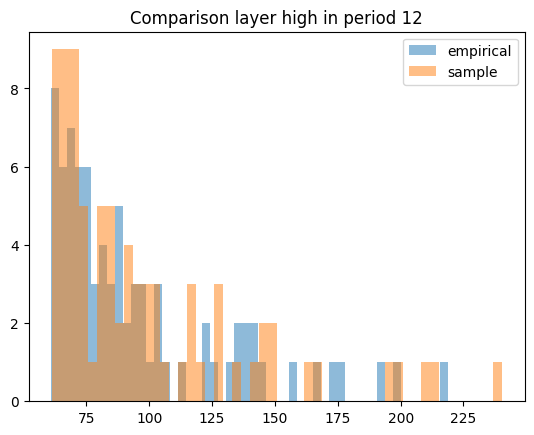

INFO:__main__:--------------------------- 
Running for layer medium
INFO:__main__:[params used] {'a': -5.729147042864096, 'b': 1.0241433343194126, 'loc': 15.008870604804322, 'scale': 0.0688936493433665}


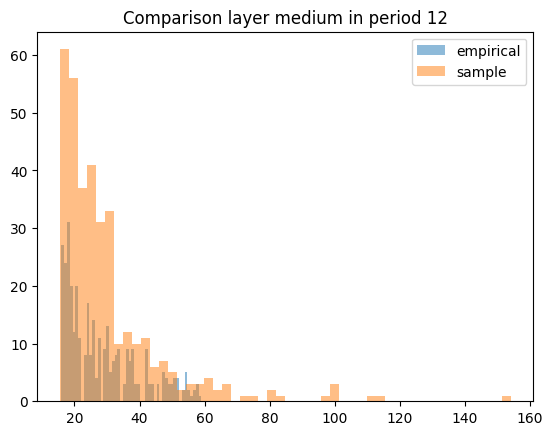

In [15]:
for period in PERIODS:
    logger.info(
            "**********************************\n"
            f"Running for period {period}"
    )
    for layer_k, layer_i in LAYERS.items():
        logger.info(
            "--------------------------- \n"
            f"Running for layer {layer_i}"
        )
        params_selected = params[layer_i][str(period)]
        logger.info(f"[params used] {params_selected}")
        # n_size = len(df_output[(df_output.layer==layer)&(df_output.month==period)]["cod_customer"].unique())
        n_size = len(df_output[(df_output.layer==layer_k)&(df_output.month==period)]["cod_customer"].index)
        sample = get_sample_from_distribution(
            n_sample = n_size, 
            params = params_selected,
        )
        plt.hist(df_output[(df_output.layer==layer_k)&(df_output.month==period)]["demand_daily"], alpha=0.5, bins=50, label="empirical")
        plt.hist(sample, alpha= 0.5, bins=50, label="sample")
        plt.title(f"Comparison layer {layer_i} in period {period}")
        plt.legend()
        plt.show()